In [1]:
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt

# Simulation of the Brownian motion

## Exercise 1

### 1.a

Let $W$ be a Brownian motion. We have that $t_{0}^{n} < t_{1}^{n} < \dots < t_{n}^{n}$, therefore, by defition of the Browinan motion:

$$
W_{t_{i}^{n}} - W_{t_{i-1}^{n}} \sim \mathcal{N}(0,t_{i}^{n} - t_{i-1}^{n}) = \mathcal{N}(0, \Delta T) = \sqrt{\Delta T}\mathcal{N}(0, 1)
$$

Therefore, let $Z_{i}\sim \mathcal{N}(0,1)$

$$
W_{t_{i}^{n}} = W_{t_{i-1}^{n}} + \sqrt{\Delta T} Z_{i}
$$

### 1.b

In [2]:
T = 1
n = 12
COPIES = 1000

In [3]:
def generate_brownian_motions(n: int) -> np.array:
    dt = 2**(-n) * T

    b_motions = np.random.normal(0, np.sqrt(dt), (COPIES,2**n))
    b_motions = b_motions.cumsum(axis = 1)

    b_motions_start = np.zeros(COPIES).reshape((COPIES,1))

    b_motions = np.concatenate([b_motions_start, b_motions], axis = 1)

    return b_motions

def get_sample_plot(n: int) -> None:
    dt = 2**(-n) * T
    b_motions = generate_brownian_motions(n)

    y_single = b_motions[0,:]
    x = np.arange(2**n + 1) * dt

    fig, axs = plt.subplots(1,2,figsize=(12,4))

    axs[0].plot(x,b_motions.T)
    axs[0].set_title("Generated Brownian motions")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("W")

    axs[1].plot(x,y_single.T)
    axs[1].set_title("Sample of generated Brownian motions")
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("W")

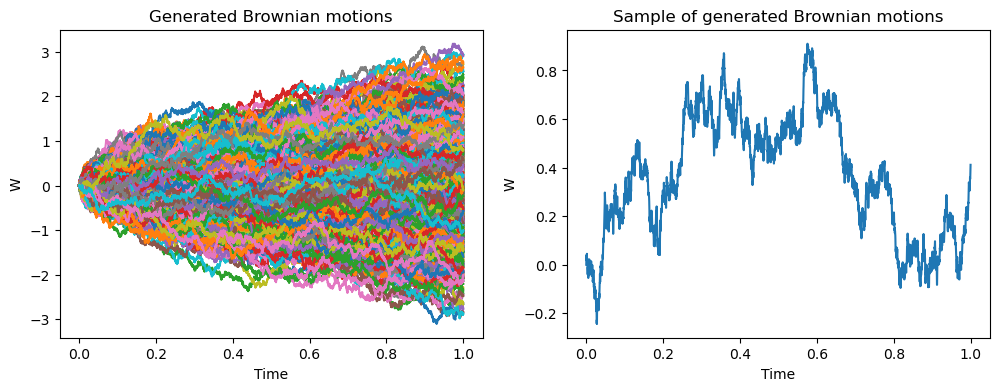

In [4]:
get_sample_plot(12)

### 1.c

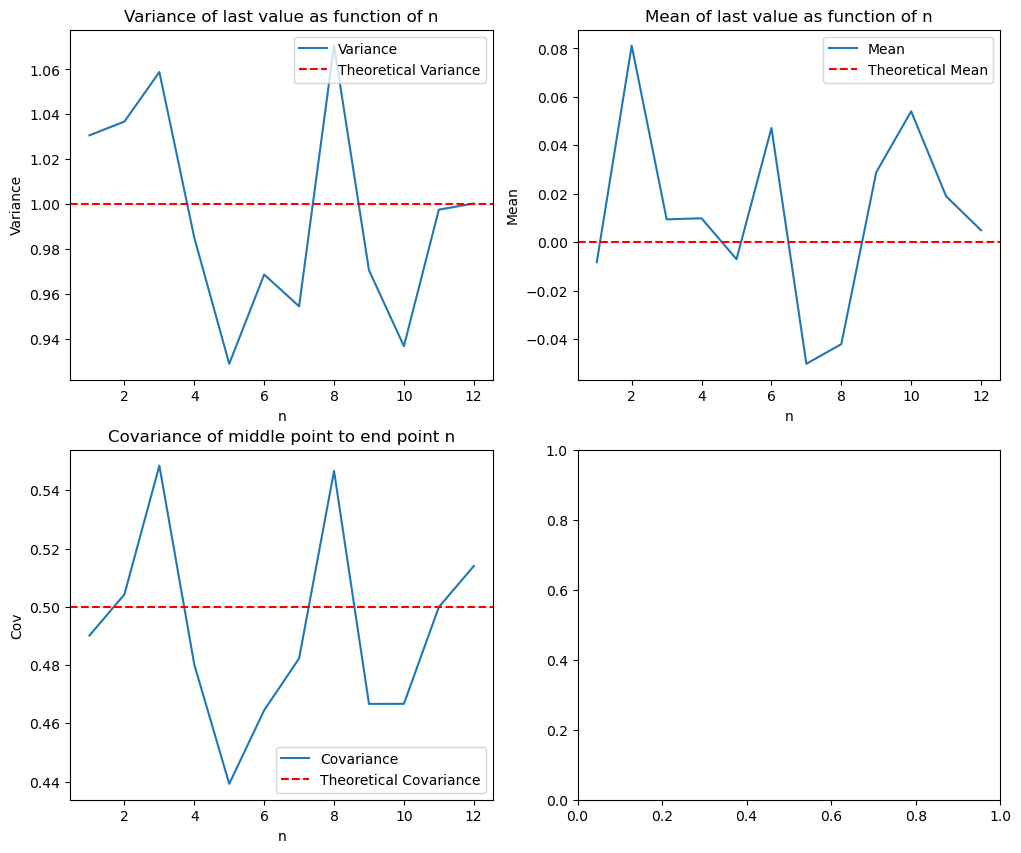

In [5]:
ns = np.arange(1,13)
b_covs = np.zeros(ns.shape[0])
b_means = np.zeros(ns.shape[0])
b_vars = np.zeros(ns.shape[0])


for idx, n in enumerate(ns):
    b_motions = generate_brownian_motions(int(n))
    cov = np.cov(b_motions[:,-1], b_motions[:,b_motions.shape[1] // 2])

    b_covs[idx] = cov[0,1]
    b_means[idx] = b_motions[:,-1].mean()
    b_vars[idx] = cov[0,0]


fig, axs = plt.subplots(2,2, figsize = (12,10))

axs[0,0].plot(ns, b_vars,label = 'Variance')
axs[0,0].axhline(1, linestyle='--', color='red', label='Theoretical Variance')
axs[0,0].set_title('Variance of last value as function of n')
axs[0,0].set_xlabel('n')
axs[0,0].set_ylabel('Variance')
axs[0,0].legend()

axs[0,1].plot(ns, b_means, label = 'Mean')
axs[0,1].axhline(0, linestyle='--', color='red', label='Theoretical Mean')
axs[0,1].set_title('Mean of last value as function of n')
axs[0,1].set_xlabel('n')
axs[0,1].set_ylabel('Mean')
axs[0,1].legend()


axs[1,0].plot(ns, b_covs, label = 'Covariance')
axs[1,0].axhline(0.5, linestyle='--', color='red', label='Theoretical Covariance')
axs[1,0].set_title('Covariance of middle point to end point n')
axs[1,0].set_xlabel('n')
axs[1,0].set_ylabel('Cov')
axs[1,0].legend()

From the curves obtained we verify that experimental observartions match theoretical predictions.

### Exercise 2

#### 2.a

We will proceed by computing the cumulative distribution function:

$$
\mathbb{P}[W_{\bar{s}} \leq y | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}] = \mathbb{P}\left[W_{\bar{s}} - \frac{W_{s_{1}} + W_{s_{2}}}{2} \leq y - \bar{x} | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}\right]
$$

$$
\mathbb{P}[W_{\bar{s}} \leq y | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}] = \mathbb{P}\left[\frac{W_{\bar{s}} - W_{s_{1}}}{2} - \frac{W_{s_{2}} - W_{\bar{s}}}{2} \leq y - \bar{x} | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}\right]
$$

As $W$ is a Brownian motion, we have that the events are independent:

- $W_{\bar{s}} - W_{s_{1}}$ and $W_{s_{2}} - W_{\bar{s}}$

And furthermore, they have the following distribution:

- $W_{\bar{s}} - W_{s_{1}} \sim \mathcal{N}(0, \bar{s} - s_{1}) = \mathcal{N}(\frac{s_{2} - s_{1}}{2})$
- $W_{s_{2}} - W_{\bar{s}} \sim \mathcal{N}(0, \bar{s} - s_{1}) = \mathcal{N}(\frac{s_{2} - s_{1}}{2})$
- As they are independent, their sum follows $\mathcal{N}(0,s_{2} - s_{1})$

This makes that:

$$
\mathbb{P}[W_{\bar{s}} \leq y | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}] = \mathbb{P}\left[\frac{W_{\bar{s}} - W_{s_{1}}}{2} - \frac{W_{s_{2}} - W_{\bar{s}}}{2} \leq y - \bar{x} \right]
$$

$$
\mathbb{P}[W_{\bar{s}} \leq y | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}] = \mathbb{P}\left[\mathcal{N}\left(0,\frac{s_{2} - s_{1}}{4}\right) \leq y - \bar{x} \right]
$$

$$
\mathbb{P}[W_{\bar{s}} \leq y | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}] = \mathbb{P}\left[\mathcal{N}\left(\bar{x},\frac{s_{2} - s_{1}}{4}\right) \leq y \right]
$$

As the cumulative distribution function characterizes the random variable, we conclude the proof.

#### 2.b

Here we have a direct application of the Markov property for a Brownian motion. In the previous question we saw that we could our CDF in the following way:

$$
\mathbb{P}\left[\frac{W_{\bar{s}} - W_{s_{1}}}{2} - \frac{W_{s_{2}} - W_{\bar{s}}}{2} \leq y - \bar{x} | W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2}\right]
$$

The first term is a Brownian motion that starts from $s_{1}$ until $\bar{s}$, hence independent of the path taken before $s_{1}$ by the Markov property. Similarly, the second term is a backwards brownian motion starting from $s_{2}$ until $\bar{s}$, which will be independent of the path after $s_{2}$.

#### 2.c

In [6]:
back_brownian = np.zeros((COPIES,2**n + 1))
back_brownian[:,-1] = np.random.normal(0,1, (COPIES))

In [7]:
back_brownian = np.zeros((COPIES,2**n + 1))
back_brownian[:,-1] = np.random.normal(0,1, (COPIES))

def fill_middle_point(j, right, left, back_brownian):
    if j >= n:
        return 
    
    back_brownian[:, (left+right)//2] = (back_brownian[:, right] + back_brownian[:, left])/2 + np.sqrt(2**-j)/2 * np.random.standard_normal(COPIES)
    j += 1
    fill_middle_point(j, right, (left+right)//2, back_brownian)
    fill_middle_point(j, (left+right)//2, left, back_brownian)

def back_W():
    back_brownian = np.zeros((COPIES,2**n + 1))
    back_brownian[:,-1] = np.random.standard_normal(COPIES)

    fill_middle_point(0,0,2**n, back_brownian)

    return back_brownian

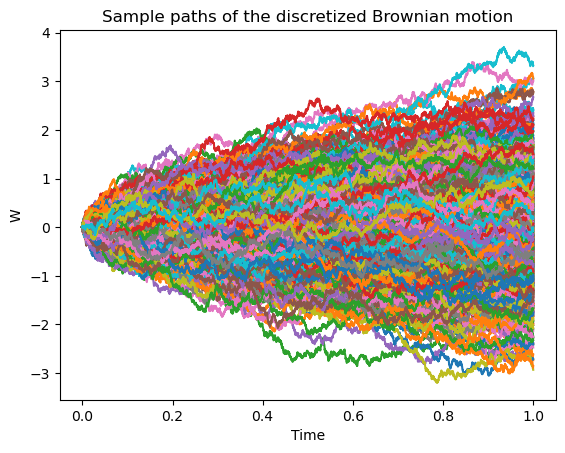

In [8]:
back_brownian = back_W()

time = np.arange(2**n +1)/2**n
back_brownian

plt.plot(time, back_brownian.T)
plt.title("Sample paths of the discretized Brownian motion")
plt.xlabel('Time')
plt.ylabel('W')
plt.show()

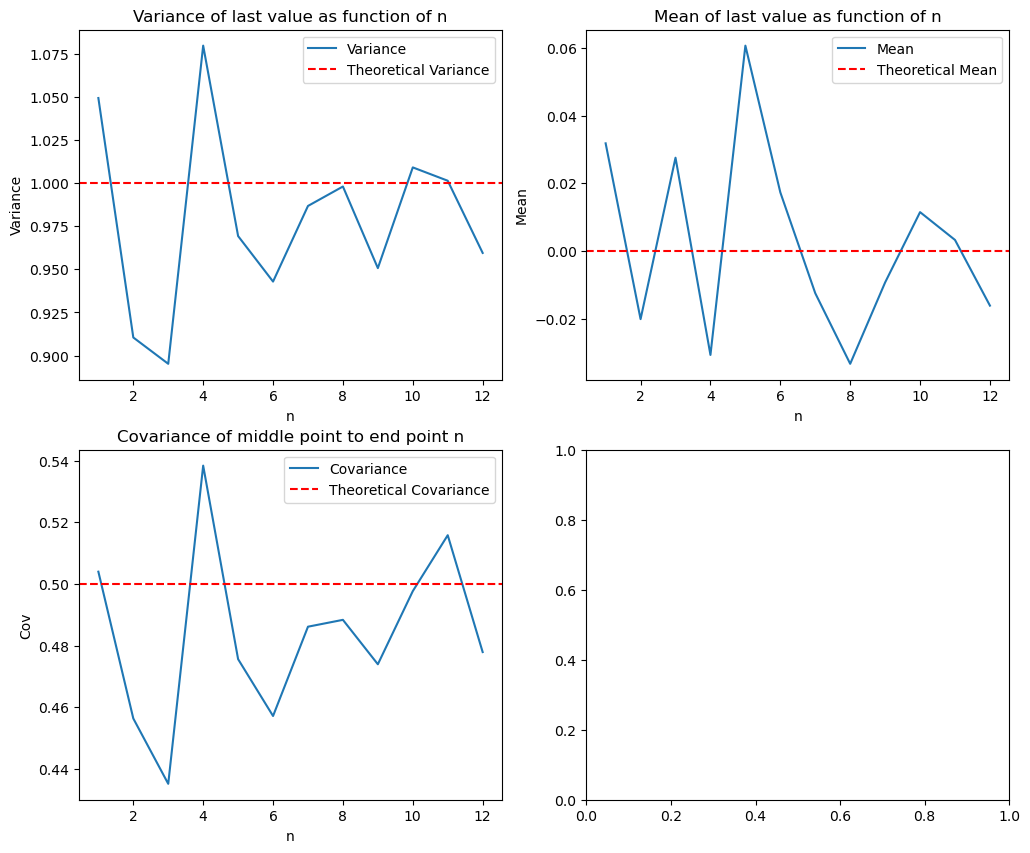

In [9]:
ns = np.arange(1,13)
b_covs = np.zeros(ns.shape[0])
b_means = np.zeros(ns.shape[0])
b_vars = np.zeros(ns.shape[0])


for idx, n in enumerate(ns):
    b_motions = back_W()
    cov = np.cov(b_motions[:,-1], b_motions[:,b_motions.shape[1] // 2])

    b_covs[idx] = cov[0,1]
    b_means[idx] = b_motions[:,-1].mean()
    b_vars[idx] = cov[0,0]


fig, axs = plt.subplots(2,2, figsize = (12,10))

axs[0,0].plot(ns, b_vars,label = 'Variance')
axs[0,0].axhline(1, linestyle='--', color='red', label='Theoretical Variance')
axs[0,0].set_title('Variance of last value as function of n')
axs[0,0].set_xlabel('n')
axs[0,0].set_ylabel('Variance')
axs[0,0].legend()

axs[0,1].plot(ns, b_means, label = 'Mean')
axs[0,1].axhline(0, linestyle='--', color='red', label='Theoretical Mean')
axs[0,1].set_title('Mean of last value as function of n')
axs[0,1].set_xlabel('n')
axs[0,1].set_ylabel('Mean')
axs[0,1].legend()


axs[1,0].plot(ns, b_covs,label = 'Covariance')
axs[1,0].axhline(0.5, linestyle='--', color='red', label='Theoretical Covariance')
axs[1,0].set_title('Covariance of middle point to end point n')
axs[1,0].set_xlabel('n')
axs[1,0].set_ylabel('Cov')
axs[1,0].legend()

We observe the same result as the previous method.

### Exercise 3

[]

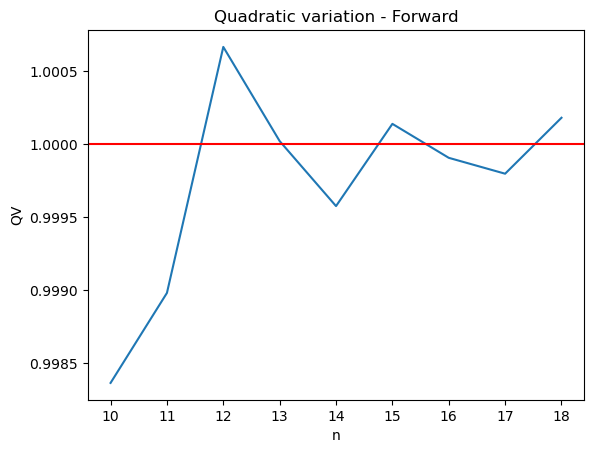

In [10]:
QV = []
ns = range(10,19)

for n in ns:
    b_motions = generate_brownian_motions(int(n))
    QV.append(np.square(np.abs(np.diff(b_motions, axis=1))).sum(axis=1).mean())
    
plt.plot(ns, QV, label = 'Experimental values')
plt.title('Quadratic variation - Forward')
plt.axhline(1, label = 'Theoretical value', color = 'red')
plt.xlabel('n')
plt.ylabel('QV')
plt.plot()


[]

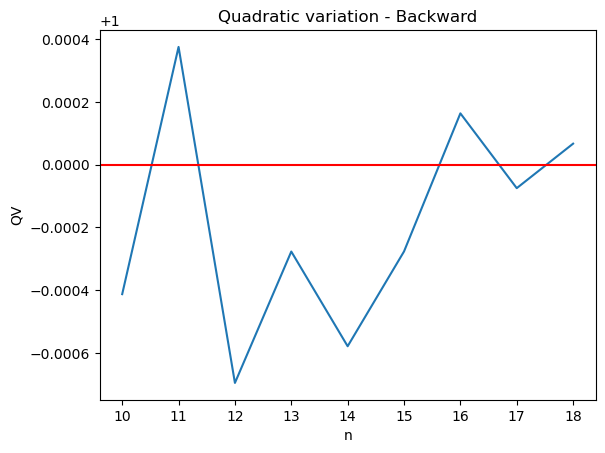

In [11]:
QV = []
ns = range(10,19)

for n in ns:
    b_motions = back_W()
    QV.append(np.square(np.abs(np.diff(b_motions, axis=1))).sum(axis=1).mean())
    
plt.plot(ns, QV, label = 'Experimental values')
plt.title('Quadratic variation - Backward')
plt.axhline(1, label = 'Theoretical value', color = 'red')
plt.xlabel('n')
plt.ylabel('QV')
plt.plot()


We observe that experimental results are in accordance with theoretical predictions. Futhermore, for values such as $n = 18$ we already have a good convergence of the quandratic variation. 